In [2]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import cross_val_score
import optuna
import dtale

# read files
data_file = 'data/traindata.csv'
lable_file = 'data/trainlabel.txt'
judge_file = 'data/testdata.csv'
data_df = pd.read_csv(data_file)
judge_df = pd.read_csv(judge_file)
lable = []
with open(lable_file) as f:
    for line in f:
        lable.append(1 if line.strip() == '1' else 0)
data_df = data_df.join(pd.DataFrame(lable, columns=['label']))

dtale.show(data_df, open_browser=True)

In [3]:
from sklearn.ensemble import RandomForestClassifier

dummies = pd.get_dummies(data_df.drop(columns=['sex', 'native.country', 'race']),
                         columns=['workclass', 'education', 'marital.status', 'occupation', 'relationship'])
train_df = dummies[:20001]
test_df = dummies[20000:]

In [267]:
rf = RandomForestClassifier(n_estimators=114, max_depth=45, min_samples_split=44, max_leaf_nodes=3994)
acc = 0
rf.fit(train_df.drop(columns=['fnlwgt', 'label']), train_df['label'], train_df['fnlwgt'])
predictions = rf.predict(test_df.drop(columns=['fnlwgt', 'label']))
print(metrics.accuracy_score(predictions, test_df['label'], sample_weight=test_df['fnlwgt']))

0.8657147606593278


In [103]:
def objective(trial:optuna.Trial):
    depth = trial.suggest_int('depth', 39, 53)
    split = trial.suggest_int('split', 39, 53)
    leaves = trial.suggest_int('leaves', 3090, 4444)
    rf = RandomForestClassifier(n_estimators=44, max_depth=depth, min_samples_split=split, max_leaf_nodes=leaves)
    # {'depth': 59, 'split': 53, 'leaves': 3997}
    # {'depth': 46, 'split': 48, 'leaves': 5904}
    # {'depth': 48, 'split': 46, 'leaves': 3698}
    # {'depth': 44, 'split': 43, 'leaves': 3918}
    # {'depth': 49, 'split': 52, 'leaves': 4033}
    # {'depth': 47, 'split': 44, 'leaves': 3139}
    # {'depth': 45, 'split': 44, 'leaves': 3994}
    rf.fit(train_df.drop(columns=['fnlwgt', 'label']), train_df['label'], train_df['fnlwgt'])
    predictions = rf.predict(test_df.drop(columns=['fnlwgt', 'label']))
    return metrics.accuracy_score(predictions, test_df['label'], sample_weight=test_df['fnlwgt'])

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=444, n_jobs=-1)
study.best_params, study.best_value

[I 2023-06-09 12:17:17,770] A new study created in memory with name: no-name-78912678-4d61-414c-b7c9-b636cc37c57b
[I 2023-06-09 12:17:20,506] Trial 9 finished with value: 0.8618419348519041 and parameters: {'depth': 48, 'split': 53, 'leaves': 3464}. Best is trial 9 with value: 0.8618419348519041.
[I 2023-06-09 12:17:20,518] Trial 2 finished with value: 0.8627031310218521 and parameters: {'depth': 52, 'split': 48, 'leaves': 3333}. Best is trial 2 with value: 0.8627031310218521.
[I 2023-06-09 12:17:20,607] Trial 1 finished with value: 0.8623747351306581 and parameters: {'depth': 53, 'split': 40, 'leaves': 3931}. Best is trial 2 with value: 0.8627031310218521.
[I 2023-06-09 12:17:20,621] Trial 12 finished with value: 0.8649054551229491 and parameters: {'depth': 41, 'split': 51, 'leaves': 3554}. Best is trial 12 with value: 0.8649054551229491.
[I 2023-06-09 12:17:20,633] Trial 8 finished with value: 0.8691048827659316 and parameters: {'depth': 46, 'split': 52, 'leaves': 4148}. Best is tria

({'depth': 45, 'split': 44, 'leaves': 3994}, 0.8718640299883154)

In [256]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import ComplementNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

dummies = pd.get_dummies(data_df.drop(columns=['sex', 'native.country', 'race', 'marital.status', 'education']),
                         columns=['workclass', 'occupation', 'relationship'])
train_df = dummies[:20001]
test_df = dummies[20000:]

bnb = BernoulliNB()
bnb.fit(train_df.drop(columns=['fnlwgt', 'label']), train_df['label'], train_df['fnlwgt'])
predictions = bnb.predict(test_df.drop(columns=['fnlwgt', 'label']))
print(metrics.accuracy_score(predictions, test_df['label'], sample_weight=test_df['fnlwgt']))

canb = CategoricalNB()
canb.fit(train_df.drop(columns=['fnlwgt', 'label']), train_df['label'], train_df['fnlwgt'])
predictions = canb.predict(test_df.drop(columns=['fnlwgt', 'label']))
print(metrics.accuracy_score(predictions, test_df['label'], sample_weight=test_df['fnlwgt']))

conb = ComplementNB()
conb.fit(train_df.drop(columns=['fnlwgt', 'label']), train_df['label'], train_df['fnlwgt'])
predictions = conb.predict(test_df.drop(columns=['fnlwgt', 'label']))
print(metrics.accuracy_score(predictions, test_df['label'], sample_weight=test_df['fnlwgt']))

gnb = GaussianNB()
gnb.fit(train_df.drop(columns=['fnlwgt', 'label']), train_df['label'], train_df['fnlwgt'])
predictions = gnb.predict(test_df.drop(columns=['fnlwgt', 'label']))
print(metrics.accuracy_score(predictions, test_df['label'], sample_weight=test_df['fnlwgt']))

mnb = MultinomialNB()
mnb.fit(train_df.drop(columns=['fnlwgt', 'label']), train_df['label'], train_df['fnlwgt'])
predictions = mnb.predict(test_df.drop(columns=['fnlwgt', 'label']))
print(metrics.accuracy_score(predictions, test_df['label'], sample_weight=test_df['fnlwgt']))

0.8137840680915457
0.8580999400285061
0.7830331687688398
0.8404873438934974
0.7830331687688398


In [39]:
from sklearn.neural_network import MLPClassifier

dummies = pd.get_dummies(data_df.drop(columns=[]),
                         columns=['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'native.country'])
train_df = dummies[:20001]
test_df = dummies[20000:]

mlp = MLPClassifier(hidden_layer_sizes=(359,), alpha=0.00042062613323840626, batch_size=926, learning_rate_init=0.00015703156146915697, max_iter=99)
mlp.fit(train_df.drop(columns=['fnlwgt', 'label']), train_df['label'])
predictions = mlp.predict(test_df.drop(columns=['fnlwgt', 'label']))
print(metrics.accuracy_score(predictions, test_df['label'], sample_weight=test_df['fnlwgt']))

0.8580020469927475


In [261]:
def objective(trial:optuna.Trial):
    layer_size = trial.suggest_int('layer_size', 200, 500)
    alpha = trial.suggest_float('alpha', 0.0001, 0.0007)
    batch_size = trial.suggest_int('batch_size', 100, 1000)
    rate_init = trial.suggest_float('rate_init', 0.0001, 0.001)
    iter = trial.suggest_int('iter', 80, 200)
    mlp = MLPClassifier(hidden_layer_sizes=(layer_size,), alpha=alpha, batch_size=batch_size, learning_rate_init=rate_init, max_iter=iter)
    mlp.fit(train_df.drop(columns=['fnlwgt', 'label']), train_df['label'])
    predictions = mlp.predict(test_df.drop(columns=['fnlwgt', 'label']))
    return metrics.accuracy_score(predictions, test_df['label'], sample_weight=test_df['fnlwgt'])

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=5, n_jobs=-1)
study.best_params, study.best_value

[I 2023-06-09 16:11:34,935] A new study created in memory with name: no-name-64c6ff2f-0a94-4cb6-a787-91453df508d1
[I 2023-06-09 16:11:43,512] Trial 3 finished with value: 0.8428585527440704 and parameters: {'layer_size': 255, 'alpha': 0.0003836000275543996, 'batch_size': 951, 'rate_init': 0.0006592755167232877, 'iter': 189}. Best is trial 3 with value: 0.8428585527440704.
[I 2023-06-09 16:11:46,919] Trial 1 finished with value: 0.852984720229818 and parameters: {'layer_size': 237, 'alpha': 0.00036982756711130625, 'batch_size': 968, 'rate_init': 0.0005675113434838709, 'iter': 119}. Best is trial 1 with value: 0.852984720229818.
[I 2023-06-09 16:11:47,672] Trial 0 finished with value: 0.821383265408605 and parameters: {'layer_size': 313, 'alpha': 0.0005306692071287453, 'batch_size': 463, 'rate_init': 0.0008110255450092883, 'iter': 109}. Best is trial 1 with value: 0.852984720229818.
[I 2023-06-09 16:11:50,942] Trial 4 finished with value: 0.8213396639589206 and parameters: {'layer_size':

({'layer_size': 237,
  'alpha': 0.00036982756711130625,
  'batch_size': 968,
  'rate_init': 0.0005675113434838709,
  'iter': 119},
 0.852984720229818)

In [23]:
from xgboost import XGBClassifier

dummies = pd.get_dummies(data_df.drop(columns=['native.country']),
                         columns=['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex'])
train_df = dummies[:20001]
test_df = dummies[20000:]

xgb = XGBClassifier(n_estimators=111, max_depth=11, min_child_weight=1459507, learning_rate=0.065082245687885)
xgb.fit(train_df.drop(columns=['fnlwgt', 'label']), train_df['label'], sample_weight=train_df['fnlwgt'])
predictions = xgb.predict(test_df.drop(columns=['fnlwgt', 'label']))
print(metrics.accuracy_score(predictions, test_df['label'], sample_weight=test_df['fnlwgt']))

0.8774824681240023


In [214]:
def objective(trial:optuna.Trial):
    n = trial.suggest_int('n', 60, 120)
    depth = trial.suggest_int('depth', 7, 16)
    min_weight = trial.suggest_int('min_weight', 1000000, 2000000)
    rate = trial.suggest_float('rate', 0.04, 0.3)
    
    clf = XGBClassifier(n_estimators=n, max_depth=depth, min_child_weight=min_weight, learning_rate=rate)
    # {'n': 70, 'depth': 9, 'min_weight': 1668735, 'rate': 0.14404510411349733}
    # {'n': 111, 'depth': 11, 'min_weight': 1459507, 'rate': 0.065082245687885}
    clf.fit(train_df.drop(columns=['fnlwgt', 'label']), train_df['label'], sample_weight=train_df['fnlwgt'])
    predictions = clf.predict(test_df.drop(columns=['fnlwgt', 'label']))
    return metrics.accuracy_score(predictions, test_df['label'], sample_weight=test_df['fnlwgt'])

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, n_jobs=-1)
study.best_params, study.best_value

[I 2023-06-09 15:19:43,877] A new study created in memory with name: no-name-14969c5c-8931-4d22-9e1f-1cbef9c4969b
[I 2023-06-09 15:19:50,785] Trial 7 finished with value: 0.8701458554865356 and parameters: {'n': 81, 'depth': 8, 'min_weight': 1838685, 'rate': 0.19880608868732097}. Best is trial 7 with value: 0.8701458554865356.
[I 2023-06-09 15:19:53,780] Trial 14 finished with value: 0.868590302710741 and parameters: {'n': 90, 'depth': 10, 'min_weight': 1877446, 'rate': 0.2624088746095793}. Best is trial 7 with value: 0.8701458554865356.
[I 2023-06-09 15:19:54,132] Trial 4 finished with value: 0.866008238101813 and parameters: {'n': 63, 'depth': 13, 'min_weight': 1336309, 'rate': 0.21989434761818522}. Best is trial 7 with value: 0.8701458554865356.
[I 2023-06-09 15:19:57,400] Trial 3 finished with value: 0.8685013856606536 and parameters: {'n': 86, 'depth': 13, 'min_weight': 1079092, 'rate': 0.2415869847771571}. Best is trial 7 with value: 0.8701458554865356.
[I 2023-06-09 15:19:58,331

({'n': 89, 'depth': 10, 'min_weight': 1531450, 'rate': 0.12705124015089755},
 0.8759543950296478)

In [236]:
from lightgbm import LGBMClassifier

dummies = pd.get_dummies(data_df.drop(columns=[]),
                         columns=['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex','native.country'])
train_df = dummies[:20001]
test_df = dummies[20000:]

lgbm = LGBMClassifier(n_estimators=418, num_leaves=83, learning_rate=0.061944964921744644)
lgbm.fit(train_df.drop(columns=['fnlwgt', 'label']), train_df['label'], sample_weight=train_df['fnlwgt'])
predictions = lgbm.predict(test_df.drop(columns=['fnlwgt', 'label']))
print(metrics.accuracy_score(predictions, test_df['label'], sample_weight=test_df['fnlwgt']))

0.8682676295335993


In [232]:
def objective(trial:optuna.Trial):
    n = trial.suggest_int('n', 44, 444)
    leaves = trial.suggest_int('leaves', 44, 4444)
    rate = trial.suggest_float('rate', 0.04, 0.3)
    
    clf = LGBMClassifier(n_estimators=n, num_leaves=leaves, learning_rate=rate)
    clf.fit(train_df.drop(columns=['fnlwgt', 'label']), train_df['label'], sample_weight=train_df['fnlwgt'])
    predictions = clf.predict(test_df.drop(columns=['fnlwgt', 'label']))
    return metrics.accuracy_score(predictions, test_df['label'], sample_weight=test_df['fnlwgt'])

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100, n_jobs=-1)
study.best_params, study.best_value

[I 2023-06-09 15:32:29,059] A new study created in memory with name: no-name-caf8a071-8fc8-4605-bae6-5459aab5cbeb
[I 2023-06-09 15:32:30,944] Trial 0 finished with value: 0.8697931704030856 and parameters: {'n': 110, 'leaves': 56, 'rate': 0.0823538579657685}. Best is trial 0 with value: 0.8697931704030856.
[I 2023-06-09 15:32:40,487] Trial 6 finished with value: 0.8594074413071037 and parameters: {'n': 52, 'leaves': 3922, 'rate': 0.21945656426617266}. Best is trial 0 with value: 0.8697931704030856.
[I 2023-06-09 15:32:49,134] Trial 11 finished with value: 0.849824033677259 and parameters: {'n': 89, 'leaves': 1330, 'rate': 0.26675646086609195}. Best is trial 0 with value: 0.8697931704030856.
[I 2023-06-09 15:32:50,927] Trial 15 finished with value: 0.8515388198300603 and parameters: {'n': 101, 'leaves': 3326, 'rate': 0.1902639272789416}. Best is trial 0 with value: 0.8697931704030856.
[I 2023-06-09 15:32:55,826] Trial 17 finished with value: 0.8607438986056068 and parameters: {'n': 259,

({'n': 418, 'leaves': 83, 'rate': 0.05540501359090331}, 0.8729807696926738)

In [20]:
best = xgb
predictions = best.predict(test_df.drop(columns=['fnlwgt', 'label']))
print(metrics.accuracy_score(predictions, test_df['label'], sample_weight=test_df['fnlwgt']))

0.8774824681240023


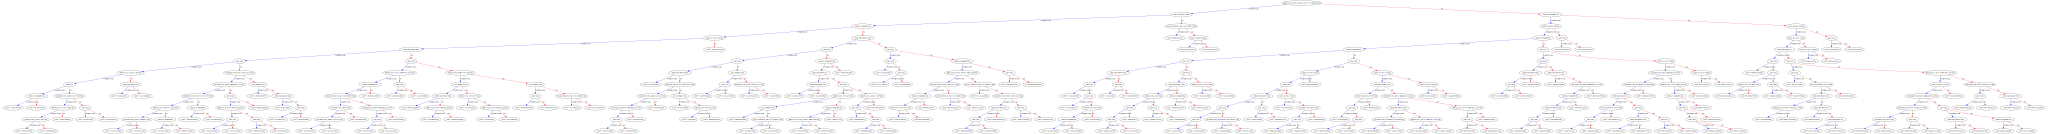

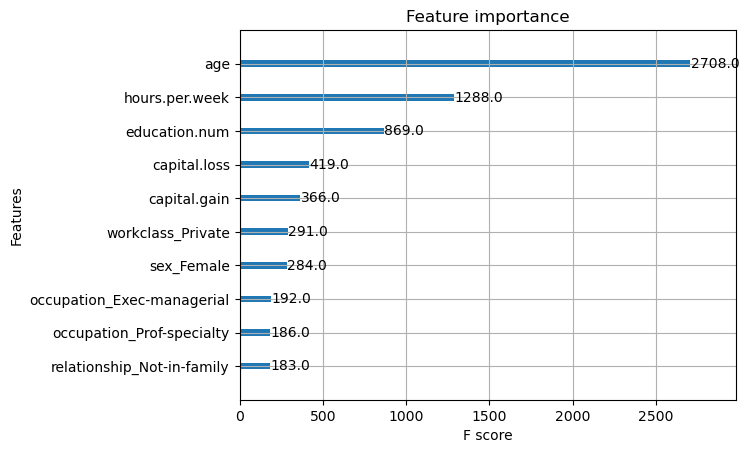

In [21]:
from xgboost import to_graphviz, plot_importance
plot_importance(xgb, max_num_features=10, importance_type='weight')
to_graphviz(xgb)

In [22]:
train_dummies = pd.get_dummies(data_df.drop(columns=['native.country']),
                               columns=['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex'])
judge_dummies = pd.get_dummies(judge_df.drop(columns=['native.country']),
                               columns=['workclass', 'education', 'marital.status', 'occupation', 'relationship', 'race', 'sex'])

best.fit(train_dummies.drop(columns=['fnlwgt', 'label']), train_dummies['label'], sample_weight=train_dummies['fnlwgt'])
predictions = best.predict(judge_dummies.drop(columns=['fnlwgt']))
with open("prediction.txt", "w") as f:
    for prediction in predictions:
        print(prediction, file=f)